# W11 - Class Practice
## Feylin Christelia - 0706022310012

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\Feylin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Data Preprocessing

In [110]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [112]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [113]:
df.isnull().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [114]:
# Drop Other names
df = df.drop('Other names', axis=1)

### Exploratory Data Analysis

C:\Users\Feylin\AppData\Local\Temp\ipykernel_40224\548757417.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




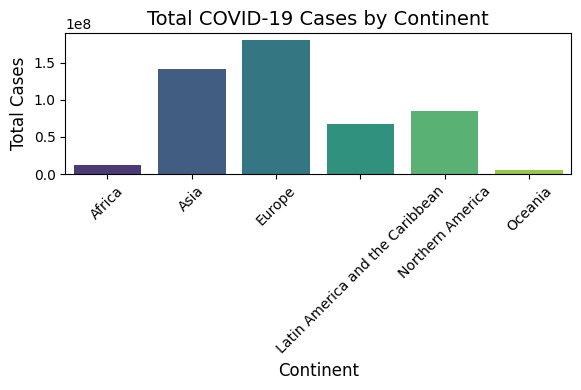

In [115]:
# Bar Chart of Total Cases by Continent

import seaborn as sns
import matplotlib.pyplot as plt

df_continent = df.groupby('Continent', as_index=False)['Total Cases'].sum()

plt.figure(figsize=(6,4))
sns.barplot(
    x='Continent',
    y='Total Cases',
    data=df_continent,
    palette='viridis'
)

plt.title('Total COVID-19 Cases by Continent', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart compares the total number of COVID-19 cases across different continents. Europe and Asia recorded the highest cumulative case counts, significantly surpassing the other regions. In contrast, Africa and Oceania reported much lower totals, showing large regional disparities in the pandemic’s overall impact.

In [116]:
# Choropleth World Map (By Continent)
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Continent",
    hover_name="Country",
    title="World Map by Continent",
    projection="natural earth",
)
fig.show()


The map visualizes the global distribution of countries by continent. Africa appears to have the largest number of countries. In contrast, Oceania has the fewest countries. This visualization helps highlight how the dataset represents global regional diversity.

In [117]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OrdinalEncoder

nominal_cols = ['Country', 'ISO 3166-1 alpha-3 CODE', 'Continent']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

### Clustering Modeling

#### K-Means

In [118]:
# create new dataframe that consist only Total Cases and Total Deaths
df = df[['Total Cases', 'Total Deaths']]
df.head()

,Total Cases,Total Deaths
0,177827,7671
1,273870,3492
2,265691,6874
3,40024,153
4,99194,1900


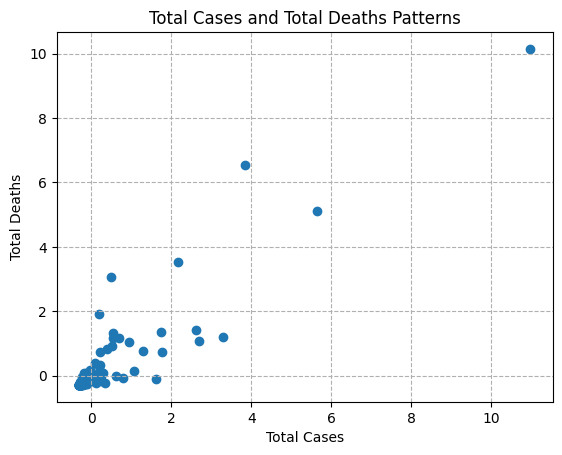

In [119]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=["Total Cases", "Total Deaths"])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Total Cases"], df_sc_scaled["Total Deaths"])
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.grid(axis='both', linestyle='--')
plt.title("Total Cases and Total Deaths Patterns")
plt.show()

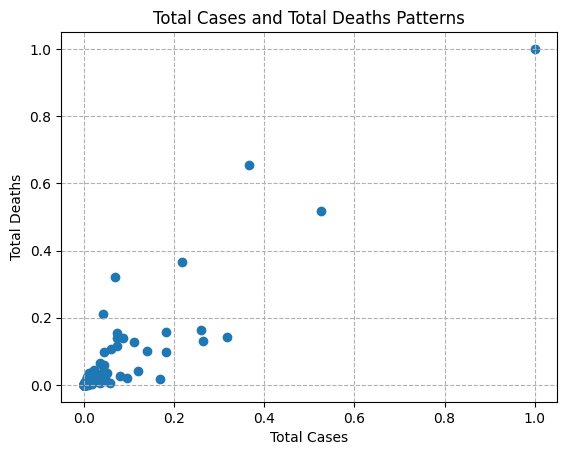

In [120]:
# scale dataset with Min Max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df), columns=["Total Cases", "Total Deaths"])

df_minmax_scaled.head()

# visualization
plt.scatter(df_minmax_scaled["Total Cases"], df_minmax_scaled["Total Deaths"])
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.grid(axis='both', linestyle='--')
plt.title("Total Cases and Total Deaths Patterns")
plt.show()

Scaling was applied to ensure that total cases and total deaths have equal influence in the clustering process, since K-Means relies on distance and is sensitive to differences in feature magnitude.

In [121]:
from sklearn.cluster import KMeans

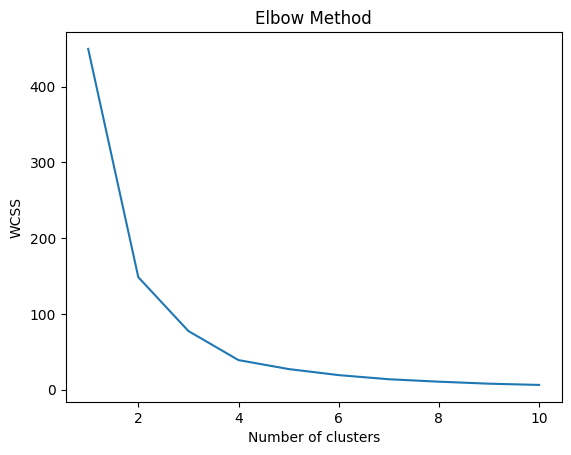

In [122]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [123]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  450.000000
1                   2  148.444562
2                   3   77.300827
3                   4   38.888329
4                   5   27.068042
5                   6   19.060014
6                   7   13.608913
7                   8   10.377477
8                   9    7.735116
9                  10    6.102064


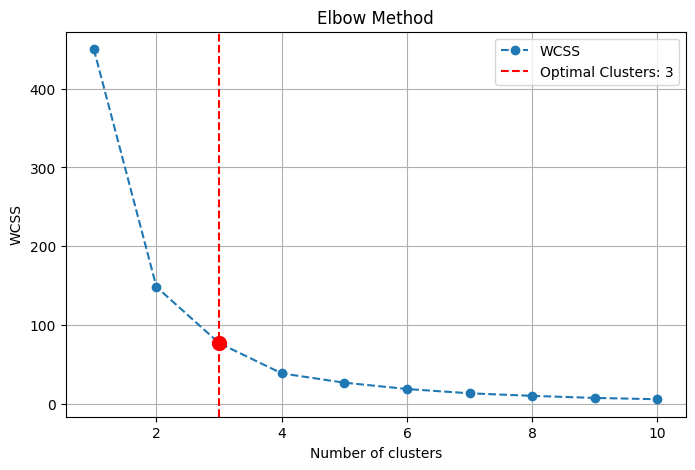

The optimal number of clusters is: 3


In [124]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

The Elbow Method shows that the optimal number of clusters is K = 3, as that’s where the WCSS curve starts to flatten, which means adding more clusters gives minimal improvement in explaining the variance.

Based on the Elbow Method analysis, the WCSS decreased sharply as the number of clusters (K) increased, but the rate of improvement began to slow noticeably after K = 3. This point formed a clear “elbow” in the WCSS curve, indicating that adding more clusters beyond five yields only minimal reductions in variance. Therefore, the optimal number of clusters for this dataset is K = 4, as it provides a good balance between simplicity and accuracy, effectively grouping customers with similar income and spending behavior into meaningful segments.

In [125]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Total Cases,Total Deaths,KMeans_Cluster
0,177827,7671,0
1,273870,3492,0
2,265691,6874,0
3,40024,153,0
4,99194,1900,0


C:\Users\Feylin\AppData\Local\Temp\ipykernel_40224\2336390932.py:4: UserWarning:


The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.



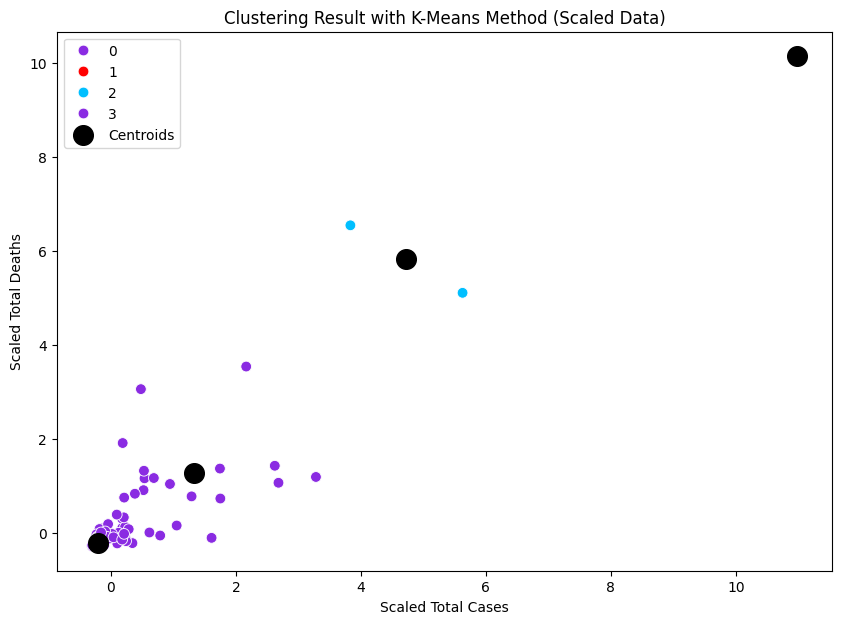

In [126]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Total Cases", y = "Total Deaths", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Total Cases")
plt.ylabel("Scaled Total Deaths")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

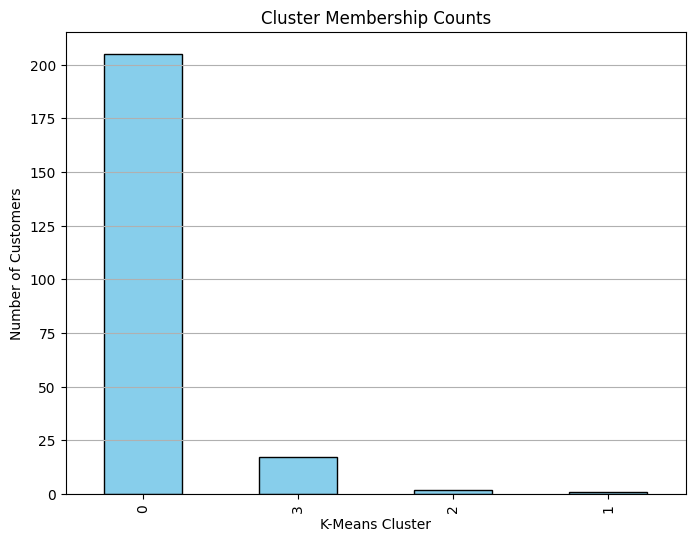

In [127]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [128]:
from sklearn.metrics import silhouette_score

ss = silhouette_score(df_sc_scaled, clusters)
print("Silhouette Score:", ss)

Silhouette Score: 0.8536389424351423


### Segmentation & Managerial Implication

In [129]:
# K-Means - Cluster Summary
cluster_summary_scaled = df.groupby('KMeans_Cluster').agg({
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max']
}).rename_axis('KMeans_Cluster')

print("Cluster Summary (Scaled Data)")
print(cluster_summary_scaled)
print("\n")

Cluster Summary (Scaled Data)
                 Total Cases                      Total Deaths           \
                        mean       min       max          mean      min   
KMeans_Cluster                                                            
0               6.658413e+05         1   7908701  7.000454e+03        0   
1               8.183905e+07  81839052  81839052  1.008222e+06  1008222   
2               3.651443e+07  29999816  43029044  5.908285e+05   521388   
3               1.177708e+07   3548559  25997852  1.500504e+05    17235   

                         
                    max  
KMeans_Cluster           
0                100050  
1               1008222  
2                660269  
3                369708  




The scaled K-Means model produces clearer cluster separation, where both Income and Credit_Score vary significantly across clusters. This indicates that scaling allows both variables to contribute equally in forming clusters. The unscaled model shows less variation in Credit_Score across clusters, meaning the clustering is dominated by Income due to its larger numeric scale.

C:\Users\Feylin\AppData\Local\Temp\ipykernel_40224\3465604231.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




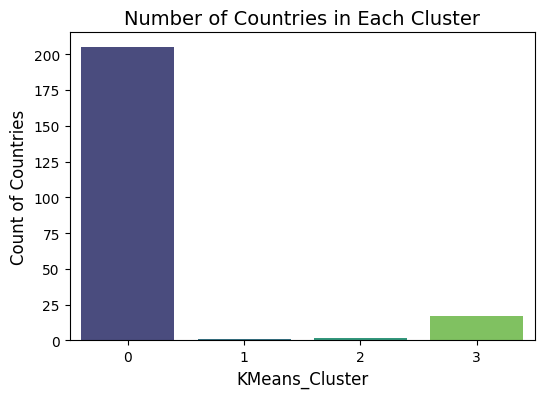

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='KMeans_Cluster', data=df, palette='viridis')

plt.title('Number of Countries in Each Cluster', fontsize=14)
plt.xlabel('KMeans_Cluster', fontsize=12)
plt.ylabel('Count of Countries', fontsize=12)
plt.show()

In [132]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="KMeans_Cluster",
    hover_name="Country",
    title="World Map Colored by Cluster",
    color_continuous_scale="Viridis",
    projection="natural earth"
)
fig.show()


ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of ['Total Cases', 'Total Deaths', 'KMeans_Cluster'] but received: Country

**Which model is better?**

The scaled version produces clearer and more balanced cluster separation compared to the unscaled version. In the scaled data, both Income and Credit_Score contribute equally to the clustering process, resulting in more meaningful and distinct groupings. 

Scaling affects the clustering result because K-Means relies on Euclidean distance, which is sensitive to differences in scale. Without scaling, features with larger numeric ranges (like Income) dominate the distance calculation, causing the algorithm to form clusters mainly based on that feature while ignoring others (like Credit_Score).

#### Each Cluster’s Characteristics and Managerial Recommendations

**Cluster 0 = Lower-Income, Moderate Credit Customers**

Persona:

*   Customers with relatively low income (~$42k) and moderate credit scores (~445).

*   Likely young professionals or early-career workers still building financial stability.

*   Show cautious financial behavior, preferring affordable or practical products.

Managerial Implications:

*   Targeting: Budget-conscious consumers seeking reliability and good value.

*   Campaign Channels: Email promotions, social media ads with price emphasis.

*   Pricing/Offers: Discounts, bundle offers, and installment payment options.

*   Retention Ideas: Loyalty rewards or cashback for repeat purchases.

**Cluster 1 = High-Income, Stable Credit Segment**

Persona:

*   High earners (~$83k) with strong credit scores (~689).

*   Likely professionals or upper-middle-class families with stable finances.

*   Tend to purchase premium products but remain rational in spending.

Managerial Implications:

*   Targeting: Premium market segment emphasizing quality and status.

*   Campaign Channels: Digital campaigns via LinkedIn, Instagram, or newsletters.

*   Pricing/Offers: Premium packages, VIP memberships, exclusive product launches.

*   Retention Ideas: Personalized offers, early access deals, and long-term loyalty programs.

**Cluster 2 = Moderate Income, High Credit Reliability**

Persona:

*   Medium-income customers (~$47k) with high credit scores (~725).

*   Financially responsible and consistent spenders.

*   Possibly mid-career individuals with stable jobs and predictable spending patterns.

Managerial Implications:

*   Targeting: Reliable, loyal customers who value trust and predictability.

*   Campaign Channels: Loyalty program updates, trust-based messaging.

*   Pricing/Offers: Family or subscription packages with clear value.

*   Retention Ideas: Reward consistency (e.g., points for timely payments or renewals).

**Cluster 3 = High-Income, Low Credit Segment**

Persona:

*   High-income earners (~$80k) but with low credit scores (~424).

*   Possibly entrepreneurs or risk-takers with irregular income or high expenditure patterns.

*   Exhibit unstable financial habits despite earning capacity.

Managerial Implications:

*   Targeting: Potential high-value customers needing trust recovery or credit rebuilding.

*   Campaign Channels: Personalized financial coaching content, email reminders, and exclusive deals.

*   Pricing/Offers: Deferred payment plans, “Buy Now Pay Later” options, or credit improvement incentives.

*   Retention Ideas: Build brand trust through transparency, after-sales support, and customer care follow-ups.